# Project Title: Bank Marketing

## Dataset Information:
   - The data is related with direct marketing campaigns of a Portuguese banking institution. 
   - The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
      in order to access if the product (bank term deposit) would be (or not) subscribed. 
   - There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.

# Project Goal :

## To predict if the client will subscribe a term deposit (variable y).

# Attribute Information

 #### Number of Attributes: 16 + output attribute
  #### Input variables:
   ##### Bank Client data:
   - age (numeric)
   - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-
     collar","self-employed","retired","technician","services") 
   - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   - education (categorical: "unknown","secondary","primary","tertiary")
   - default: has credit in default? (binary: "yes","no")
   - balance: average yearly balance, in euros (numeric) 
   - housing: has housing loan? (binary: "yes","no")
   - loan: has personal loan? (binary: "yes","no")
   - related with the last contact of the current campaign:
   - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   - day: last contact day of the month (numeric)
   - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   - duration: last contact duration, in seconds (numeric)
   - other attributes:
   - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means that      client was not previously contacted)      
   - previous: number of contacts performed before this campaign and for this client (numeric)
   - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

##### Output variable (desired target):
   - y - has the client subscribed a term deposit? (binary: "yes","no")

# Loading Dataset :

In [2]:
import pandas as pd
data = pd.read_csv('bank-full.csv',';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Info :

In [3]:
data.shape

(45211, 17)

In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
data.value_counts()

age  job         marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  y  
18   student     single    primary    no       608      no       no    cellular   12   aug    267       1         -1     0         unknown   yes    1
45   management  married   tertiary   no       0        no       no    cellular   20   aug    71        2         -1     0         unknown   no     1
                 divorced  tertiary   no       54       no       yes   cellular   21   jul    34        3         -1     0         unknown   no     1
                                               220      yes      no    unknown    18   jun    89        4         -1     0         unknown   no     1
                                               335      no       no    cellular   5    aug    297       1         -1     0         unknown   no     1
                                                                                                         

In [7]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# EDA

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [9]:
data.drop('contact', axis=1, inplace=True)
data.drop('poutcome', axis=1, inplace=True)
data.drop('month', axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   day        45211 non-null  int64
 9   duration   45211 non-null  int64
 10  campaign   45211 non-null  int64
 11  pdays      45211 non-null  int64
 12  previous   45211 non-null  int64
 13  y          45211 non-null  int32
dtypes: int32(7), int64(7)
memory usage: 3.6 MB


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplots 

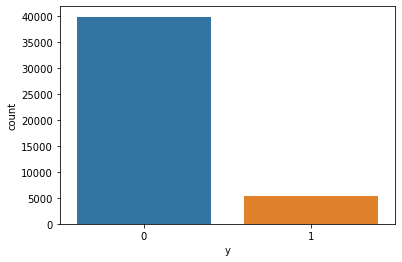

In [12]:
sns.countplot(x = 'y' , data = data)
plt.show()

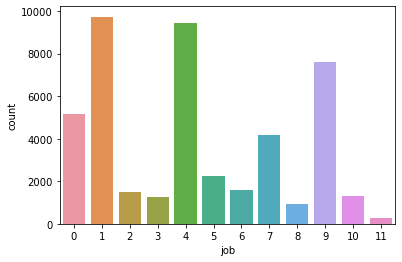

In [13]:
sns.countplot(x = 'job', data = data)
plt.show()

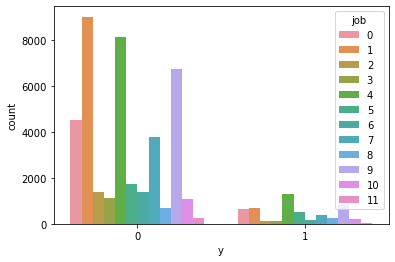

In [14]:
sns.countplot( x = 'y' , hue = 'job', data = data )
plt.show()

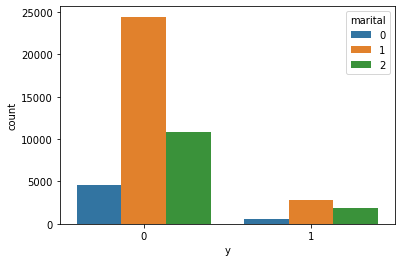

In [15]:
sns.countplot( x = 'y' , hue = 'marital', data = data )
plt.show()

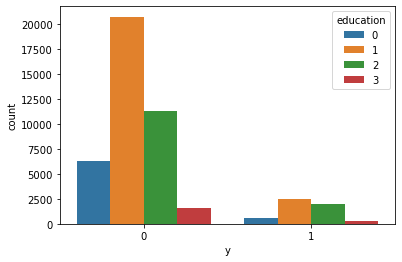

In [16]:
sns.countplot( x = 'y' , hue = 'education', data = data )
plt.show()

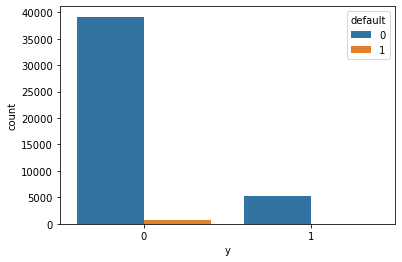

In [17]:
sns.countplot( x = 'y' , hue = 'default', data = data )
plt.show()

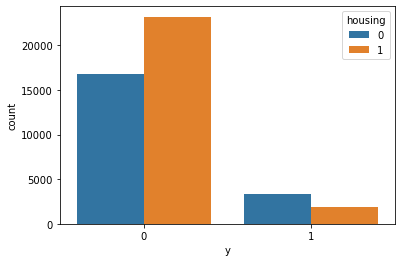

In [18]:
sns.countplot( x = 'y' , hue = 'housing', data = data )
plt.show()

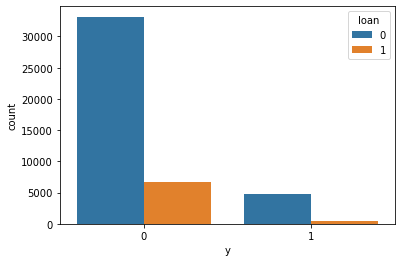

In [19]:
sns.countplot( x = 'y' , hue = 'loan', data = data )
plt.show()

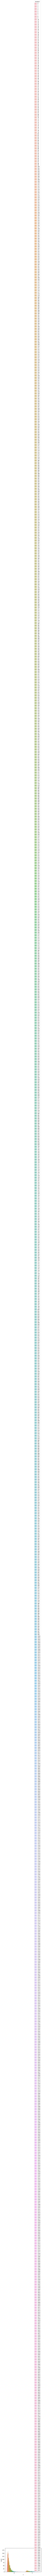

In [20]:
sns.countplot( x = 'y' , hue = 'duration', data = data )
plt.show()

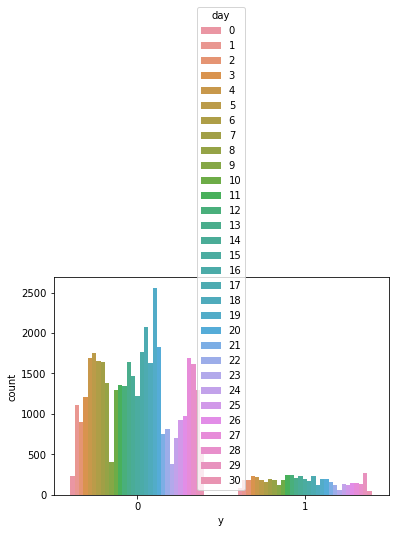

In [46]:
sns.countplot( x = 'y' , hue = 'day', data = data )
plt.show()

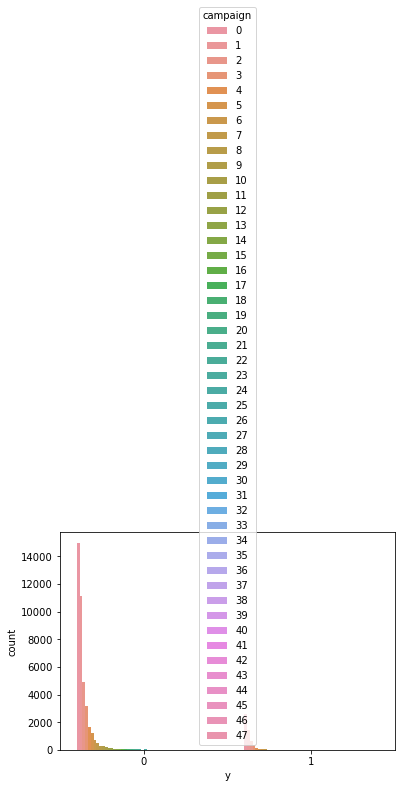

In [47]:
sns.countplot( x = 'y' , hue = 'campaign', data = data )
plt.show()

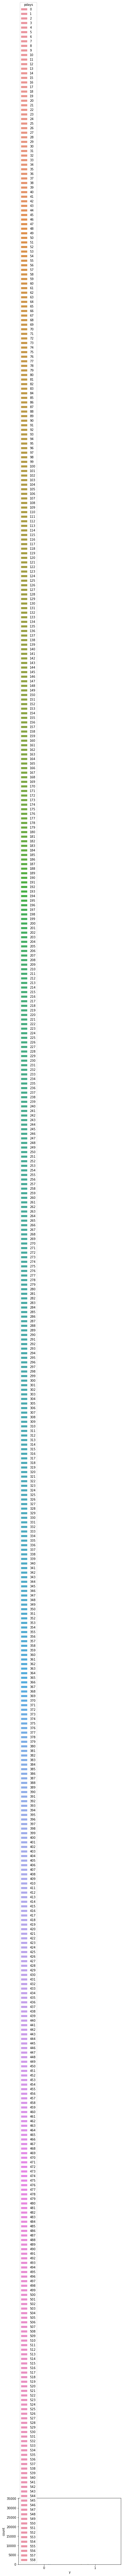

In [48]:
sns.countplot( x = 'y' , hue = 'pdays', data = data )
plt.show()

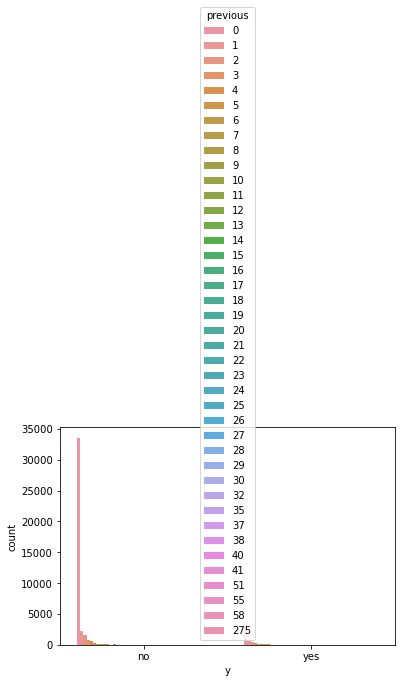

In [51]:
sns.countplot( x = 'y' , hue = 'previous', data = data )
plt.show()

# Boxplots

<AxesSubplot:xlabel='y', ylabel='age'>

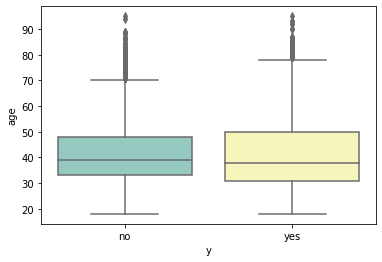

In [52]:
sns.boxplot(x='y', y='age', data=data,palette = "Set3")

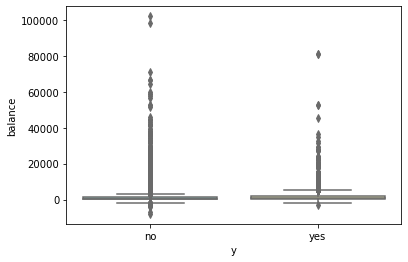

In [53]:
ax=sns.boxplot(x='y', y='balance', data=data,palette = "Set3")

In [1]:
ax=sns.boxplot(x='y', y='day', data=data,palette = "Set3")

NameError: name 'sns' is not defined

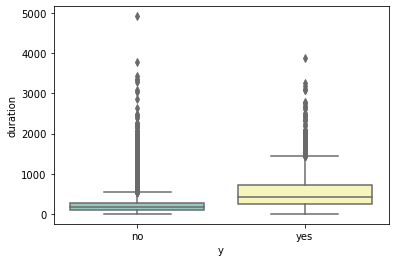

In [55]:
ax=sns.boxplot(x='y', y='duration', data=data,palette = "Set3")

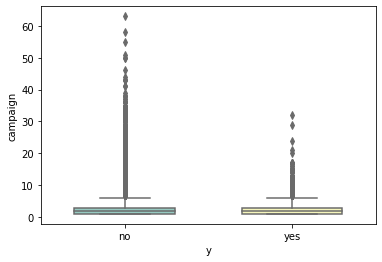

In [57]:
ax=sns.boxplot(x='y', y='campaign', data=data, width=0.6,whis = 1.5,palette = "Set3")

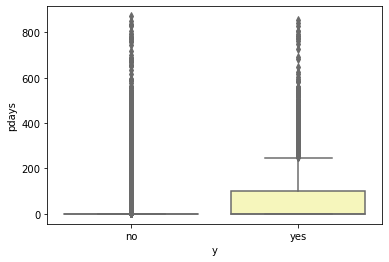

In [58]:
ax=sns.boxplot(x='y', y='pdays', data=data,palette = "Set3")

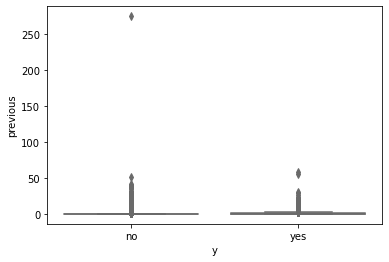

In [59]:
ax=sns.boxplot(x='y', y='previous', data=data,palette = "Set3")

# Checking of Correlation

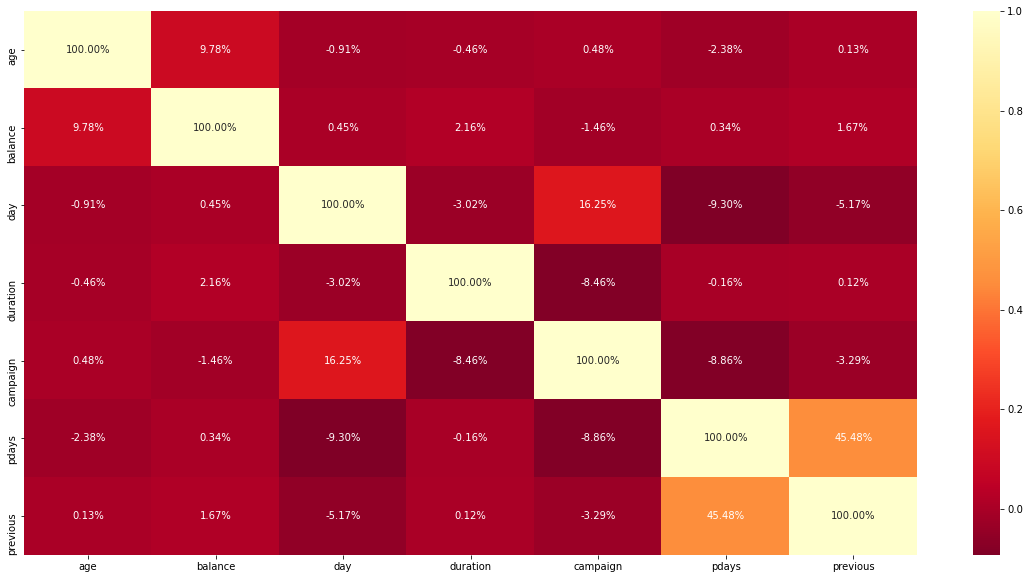

In [62]:
plt.figure(figsize=(20,10))
ax=sns.heatmap(data.corr(),annot=True,fmt='.2%', cmap='YlOrRd_r')

# Splitting The Dataset

In [91]:
X = data.drop('y', axis = 1)
y = data['y']

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 20)

# Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [106]:
lgmodel = LogisticRegression(max_iter=10000)
lgmodel.fit(X_train,y_train)
y_pred = lgmodel.predict(X_test)
accuracy_score(y_test,y_predict)

0.8928044824535535

In [107]:
confusion_matrix(y_test,y_pred)

array([[11749,   257],
       [ 1197,   361]], dtype=int64)

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12006
           1       0.58      0.23      0.33      1558

    accuracy                           0.89     13564
   macro avg       0.75      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



# SVM

In [110]:
from sklearn.svm import SVC

In [124]:
SVM_model = SVC()
SVM_model.fit(X_train,y_train)
y_predict = SVM_model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8928044824535535

In [125]:
confusion_matrix(y_test,y_pred)

array([[11749,   257],
       [ 1197,   361]], dtype=int64)

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12006
           1       0.58      0.23      0.33      1558

    accuracy                           0.89     13564
   macro avg       0.75      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



# Decision Tree 

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train,y_train)
y_predict = DT_model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8928044824535535

In [128]:
confusion_matrix(y_test,y_pred)

array([[11749,   257],
       [ 1197,   361]], dtype=int64)

In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12006
           1       0.58      0.23      0.33      1558

    accuracy                           0.89     13564
   macro avg       0.75      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



# Random Forest 

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)
y_predict = RF_model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8928044824535535

# XGBoost 

In [123]:
from xgboost import XGBClassifier

In [131]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train,y_train)
y_predict = XGB_model.predict(X_test)
accuracy_score(y_test,y_predict)

C:\Users\Sambit\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:04:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8928044824535535